In [ ]:
import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv(r'Sales per State.csv')

In [ ]:
data.head()

,Sl. No.,State/UT-wise,Number of Electric/Hybrid Vehicle (approx.)
0,1,Jammu & Kashmir,478
1,2,Punjab,6925
2,3,Haryana,25908
3,4,Chandigarh,2533
4,5,Delhi,20228


### Statistics of Electirc Vehicles per State

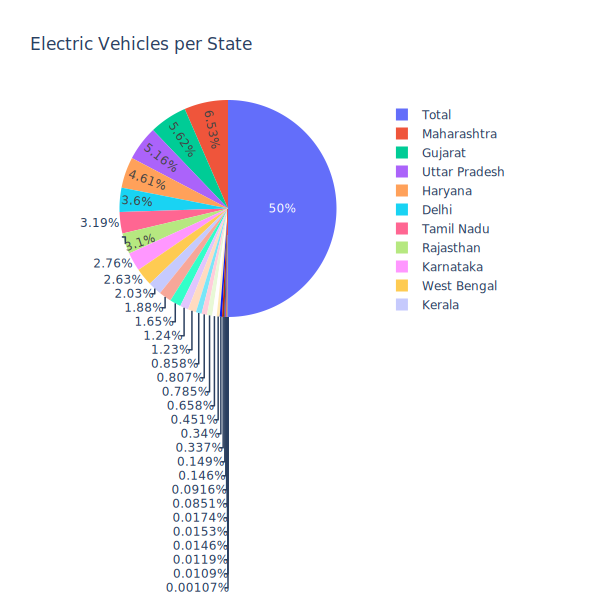

In [ ]:
fig = px.pie(data, values='Number of Electric/Hybrid Vehicle (approx.)', names='State/UT-wise', title='Electric Vehicles per State',width=600, height=600)
fig.show()

#### From the above

In [ ]:
data2 = pd.read_csv(r'cars_ds_final.csv')

In [ ]:
data2.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0000,2.0000,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0000,2.0000,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0000,2.0000,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0000,2.0000,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0000,2.0000,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2.Fuel_Type.unique()

array(['Petrol', 'CNG', 'Diesel', 'CNG + Petrol', 'Hybrid', 'Electric'],
      dtype=object)

In [ ]:
data2['Fuel_Type'].value_counts()


Petrol          643
Diesel          582
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: Fuel_Type, dtype: int64

In [ ]:
FuelTypeCount = [643,16,582,6,15,14]

#### Below pie chart shows the fuel type of  Cars in India .

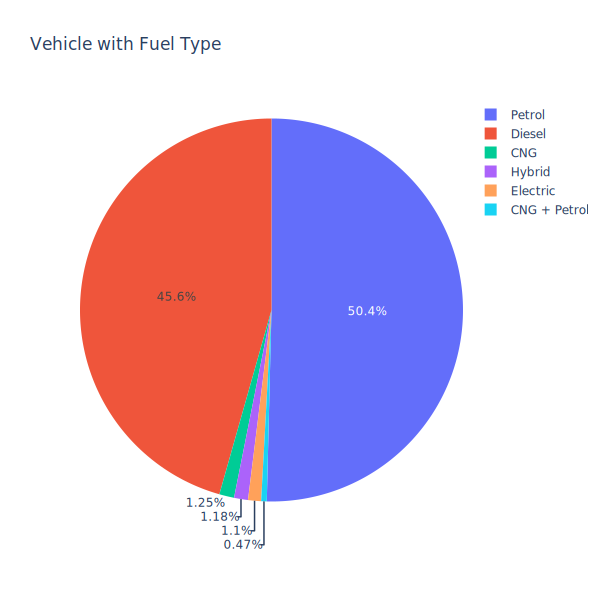

In [ ]:
fig = px.pie(names=data2.Fuel_Type.unique() , values=FuelTypeCount, title='Vehicle with Fuel Type', width=600, height=600)
fig.show()

In [ ]:
e_car_data = pd.read_csv(r'ElectricCarData_Clean.csv')

In [ ]:
e_car_data.head(

)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceRupee
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4507750.0000
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,2437500.0000
2,Polestar,2,4.7000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,4585750.0000
3,BMW,iX3,6.8000,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,5528250.0000
4,Honda,e,9.5000,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,2681006.2500


In [ ]:
e_car_data.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  PriceRupee       103 non-null    float64
dtypes: float64(2), int64(5), object(8)
memory usage: 12.2+ KB


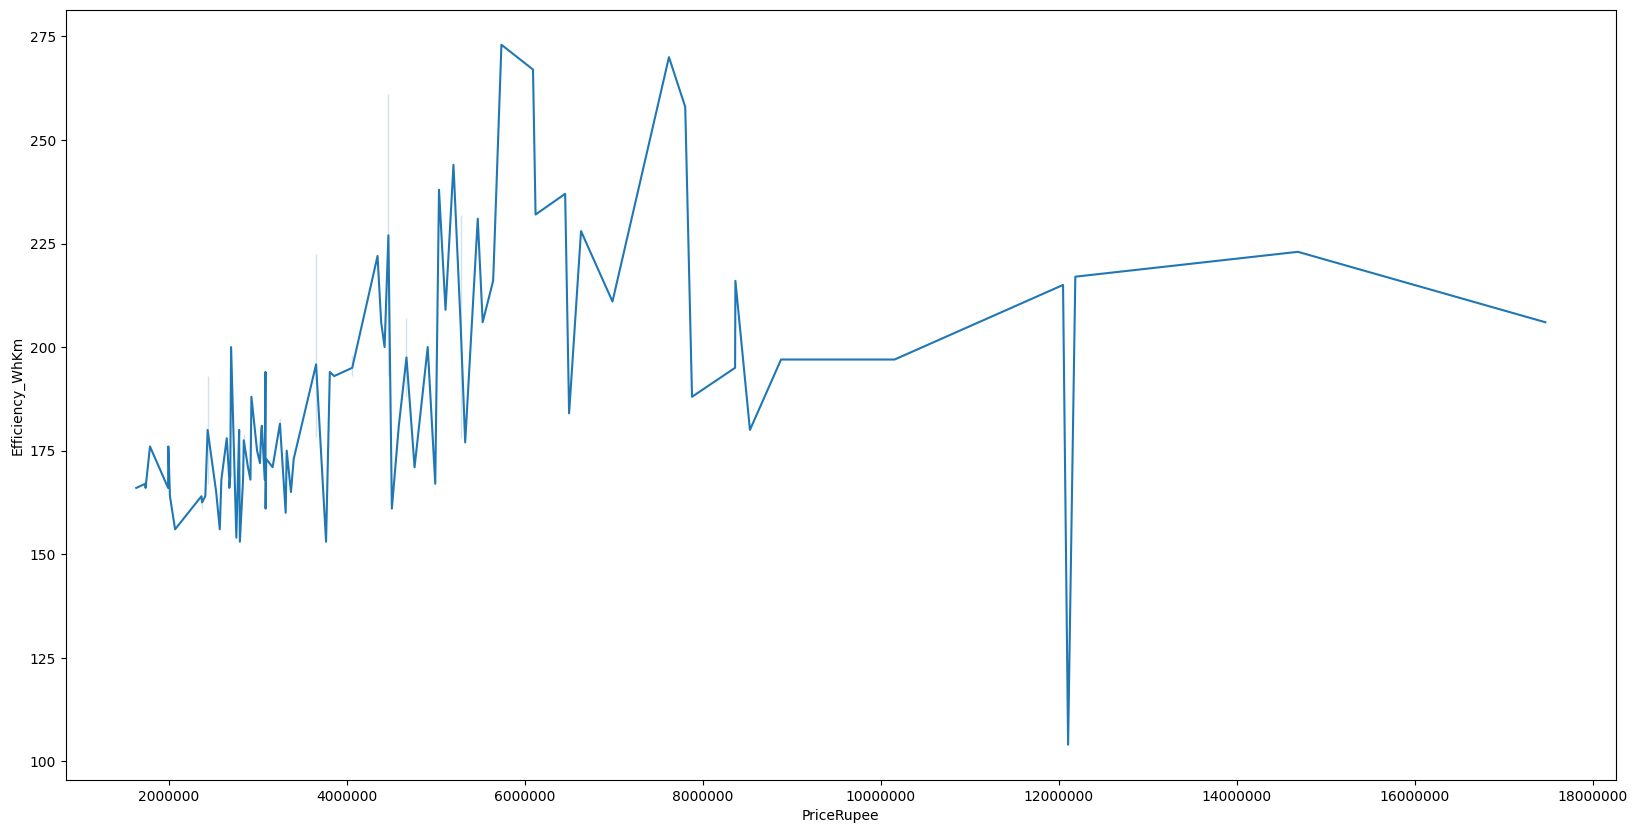

In [ ]:
plt.figure(figsize=(20,10))
plt = sns.lineplot(x='PriceRupee', y='Efficiency_WhKm', data=e_car_data)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
survey = pd.read_csv(r"EV_survey.csv")

In [ ]:
survey.head()

,State_UT,Area_of_Living,Age,Annual_Income,Own_EV,Reason_own,EV_type,EV_price,EV_Manufacturar,EV_Range,EV_Recomendation,EV_Interest,EV_Interest_Type,EV_Budget,EV_Interest_Reason,Vehicle_Preference
0,Telangana,Urban,19,10 - 15 Lakh,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2 Wheeler,20000.0000,High fuel prices,Electric Vehicles
1,Maharashtra,Urban,21,< 5 Lakh,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2 Wheeler,100000.0000,High fuel prices,Electric Vehicles
2,Maharashtra,Rural,20,< 5 Lakh,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Electric Vehicles
3,Maharashtra,Urban,20,10 - 15 Lakh,Yes,High fuel Prices,2 Wheeler,125000.0000,Bajaj,90.0000,Yes,Yes,4 Wheeler,500000.0000,Environmentally better,Electric Vehicles
4,Maharashtra,Urban,27,< 5 Lakh,No,NaN,NaN,NaN,NaN,NaN,Yes,Yes,4 Wheeler,2000000.0000,Better performance,Electric Vehicles


In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_UT            183 non-null    object 
 1   Area_of_Living      183 non-null    object 
 2   Age                 183 non-null    int64  
 3   Annual_Income       183 non-null    object 
 4   Own_EV              183 non-null    object 
 5   Reason_own          47 non-null     object 
 6   EV_type             48 non-null     object 
 7   EV_price            35 non-null     float64
 8   EV_Manufacturar     40 non-null     object 
 9   EV_Range            30 non-null     float64
 10  EV_Recomendation    105 non-null    object 
 11  EV_Interest         183 non-null    object 
 12  EV_Interest_Type    146 non-null    object 
 13  EV_Budget           97 non-null     float64
 14  EV_Interest_Reason  135 non-null    object 
 15  Vehicle_Preference  183 non-null    object 
dtypes: float

In [ ]:
import seaborn as sns

<Axes: xlabel='Own_EV', ylabel='Age'>

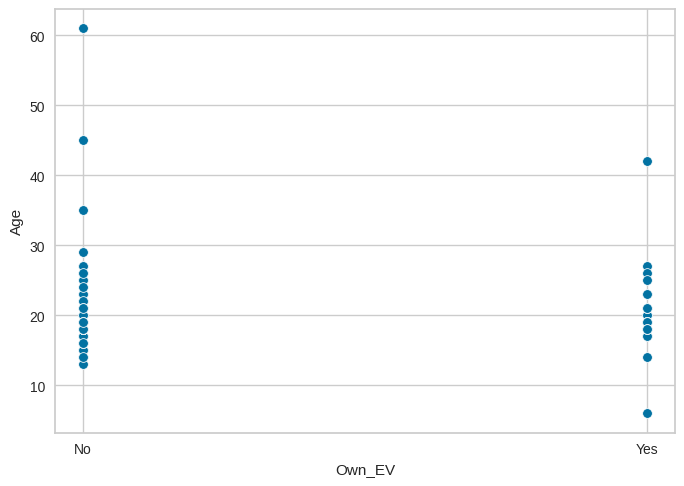

In [ ]:
sns.scatterplot(x=survey["Own_EV"],y=survey["Age"])

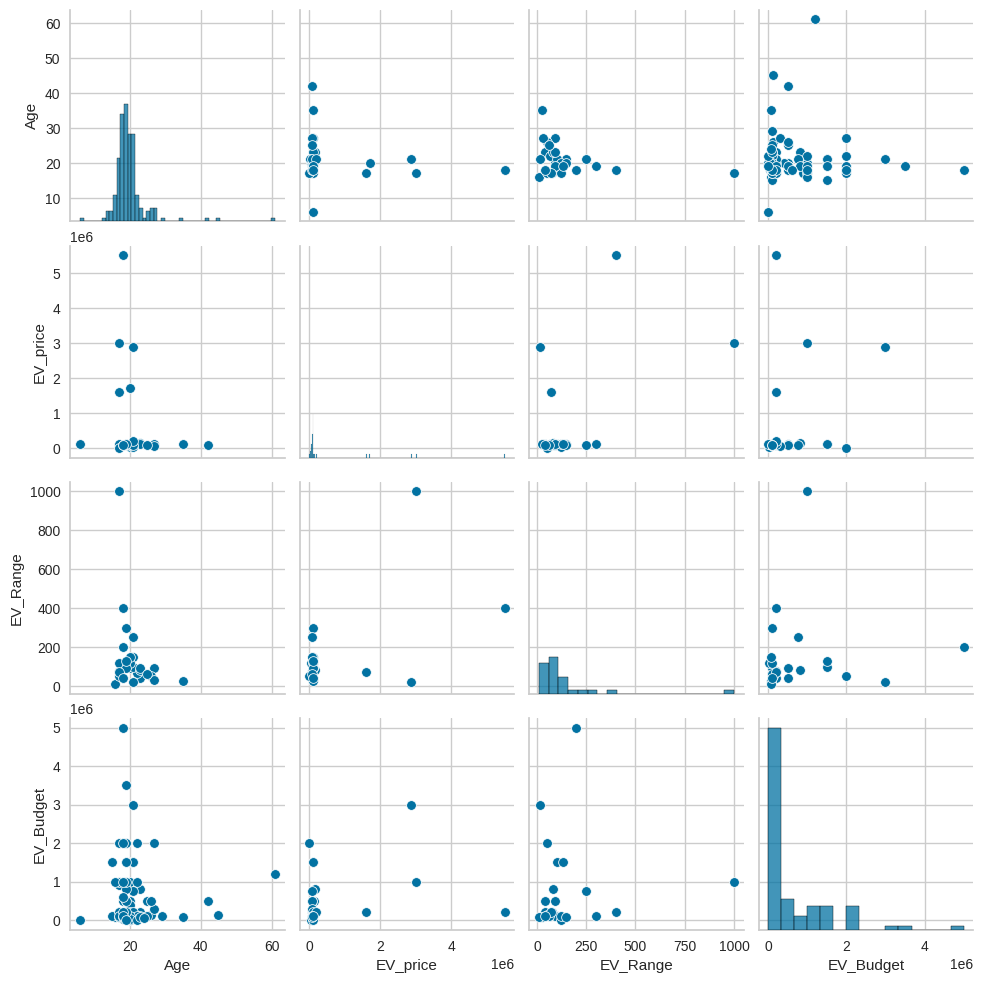

In [ ]:
sns.pairplot(survey)

#### EV Ownership from survey

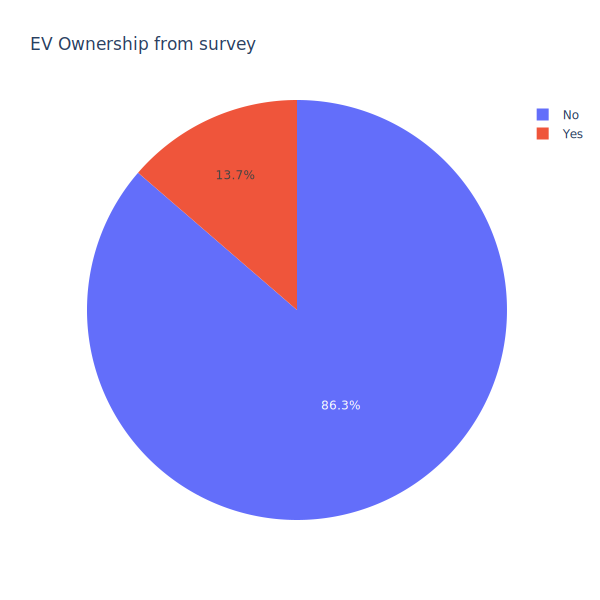

In [ ]:
fig = px.pie(names=survey.Own_EV.unique(), values=survey['Own_EV'].value_counts(), title='EV Ownership from survey', width=600, height=600)
fig.show()

In [ ]:
survey.EV_type.unique()

array([nan, '2 Wheeler', '4 Wheeler', '3 Wheeler'], dtype=object)

In [ ]:
survey["EV_type"].value_counts()

2 Wheeler    36
4 Wheeler    10
3 Wheeler     2
Name: EV_type, dtype: int64

In [ ]:
EV_Type = ['2 Wheeler', '4 Wheeler', '3 Wheeler']
EV_Type_count = [36,10,2]

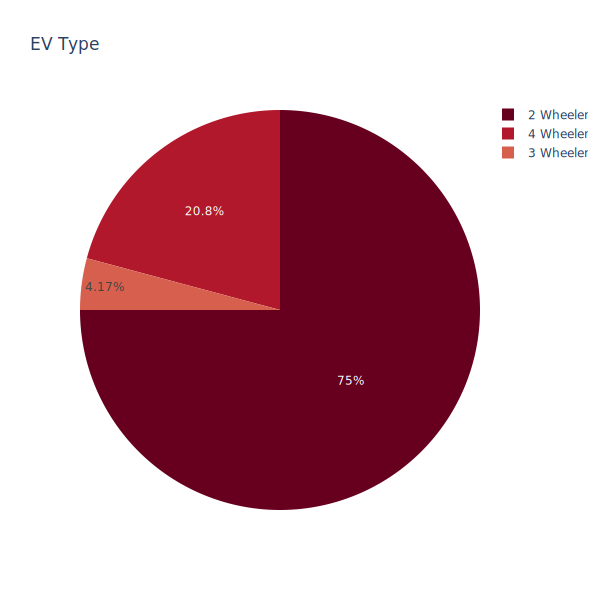

In [ ]:
fig = px.pie(names=EV_Type, values=EV_Type_count, title='EV Type', color_discrete_sequence=px.colors.sequential.RdBu,width=600, height=600)
fig.show()

#### The pie chart shows that most of the EV vehicles i.e 75% of the EV vehilces on the indian roads are 2 wheelers.

In [ ]:
df = survey[survey["Own_EV"]=='Yes']
df.head()

,State_UT,Area_of_Living,Age,Annual_Income,Own_EV,Reason_own,EV_type,EV_price,EV_Manufacturar,EV_Range,EV_Recomendation,EV_Interest,EV_Interest_Type,EV_Budget,EV_Interest_Reason,Vehicle_Preference
3,Maharashtra,Urban,20,10 - 15 Lakh,Yes,High fuel Prices,2 Wheeler,125000.0000,Bajaj,90.0000,Yes,Yes,4 Wheeler,500000.0000,Environmentally better,Electric Vehicles
5,Telangana,Urban,18,5 - 10 Lakh,Yes,High fuel Prices,2 Wheeler,80000.0000,Okinawa,40.0000,No,No,4 Wheeler,500000.0000,High fuel prices,Internal Combustion Vehicles
8,Maharashtra,Urban,21,5 - 10 Lakh,Yes,High fuel Prices,2 Wheeler,100000.0000,Ola,150.0000,Yes,No,4 Wheeler,NaN,High fuel prices,Electric Vehicles
9,Karnataka,Urban,23,5 - 10 Lakh,Yes,Environmentally better,2 Wheeler,100000.0000,Ather,40.0000,Yes,Yes,2 Wheeler,200000.0000,Environmentally better,Electric Vehicles
10,Maharashtra,Urban,20,> 20 Lakh,Yes,Convenience (no petrol pumps ),4 Wheeler,1700000.0000,Tata,NaN,Yes,Yes,4 Wheeler,NaN,NaN,Electric Vehicles


In [ ]:
df.State_UT.unique()

array(['Maharashtra', 'Telangana', 'Karnataka', 'West Bengal',
       'Jharkhand', 'Goa', 'Bihar'], dtype=object)

In [ ]:
State_wise_EV_Ownership = ['Telangana', 'Maharashtra', 'Karnataka', 'West Bengal', 'Jharkhand', 'Goa', 'Bihar']



In [ ]:
df['State_UT'].value_counts()

Telangana      12
Maharashtra     6
Karnataka       2
West Bengal     2
Jharkhand       1
Goa             1
Bihar           1
Name: State_UT, dtype: int64

In [ ]:
State_wise_EV_Ownership_count = [12,6,2,2,1,1,1]

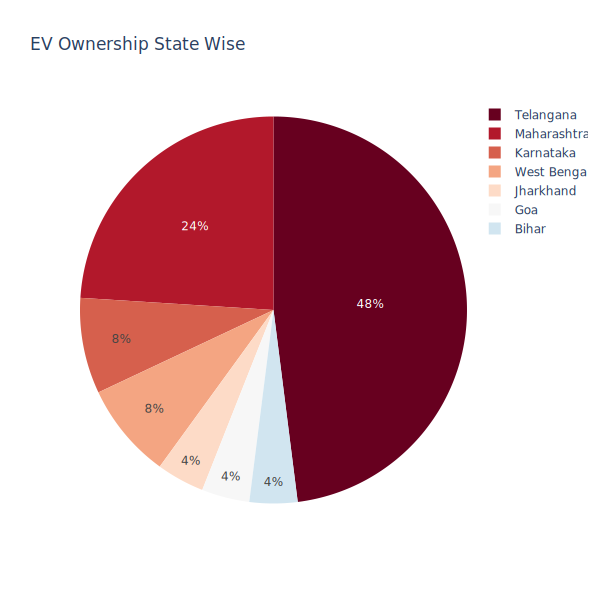

In [ ]:
fig = px.pie(names=State_wise_EV_Ownership, values=State_wise_EV_Ownership_count, title='EV Ownership State Wise', color_discrete_sequence=px.colors.sequential.RdBu,width=600, height=600)
fig.show()


In [ ]:
df.EV_Manufacturar.unique()

array(['Bajaj', 'Okinawa', 'Ola', 'Ather', 'Tata', 'Kinetic', 'Okinawa ',
       'Kinetic ', 'Pure', 'Eve', nan, 'Mahindra', 'Hero'], dtype=object)

In [ ]:
EV_Manufacturar = ['Bajaj', 'Okinawa', 'Ola', 'Ather', 'Tata', 'Kinetic', 'Pure', 'Eve', 'Mahindra', 'Hero']

In [ ]:
df['EV_Manufacturar'].value_counts()

Ola         4
Tata        4
Ather       3
Bajaj       2
Hero        2
Okinawa     1
Kinetic     1
Okinawa     1
Kinetic     1
Pure        1
Eve         1
Mahindra    1
Name: EV_Manufacturar, dtype: int64

In [ ]:
EV_Manufacturar_count = [2,2,4,3,4,2,1,1,1,2]

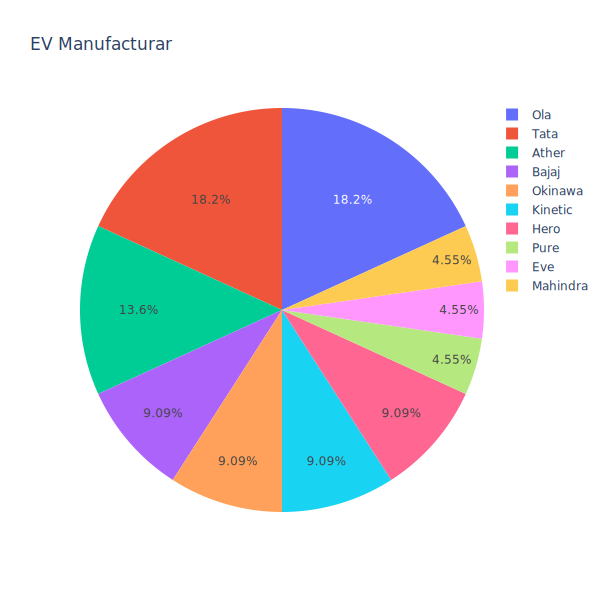

In [ ]:
fig = px.pie(names=EV_Manufacturar, values=EV_Manufacturar_count, title='EV Manufacturar',width=600, height=600)
fig.show()

In [ ]:
df.Annual_Income.unique()

array(['10 - 15 Lakh', '5 - 10 Lakh', '> 20 Lakh', '< 5 Lakh',
       '15 - 20 Lakh'], dtype=object)

In [ ]:
Annual_Income = ['10 - 15 Lakh', '5 - 10 Lakh', '> 20 Lakh', '< 5 Lakh', '15 - 20 Lakh']

In [ ]:
df['Annual_Income'].value_counts()

< 5 Lakh        10
5 - 10 Lakh      8
10 - 15 Lakh     4
> 20 Lakh        2
15 - 20 Lakh     1
Name: Annual_Income, dtype: int64

In [ ]:
Annual_Income_Count = [4,8,2,10,1]

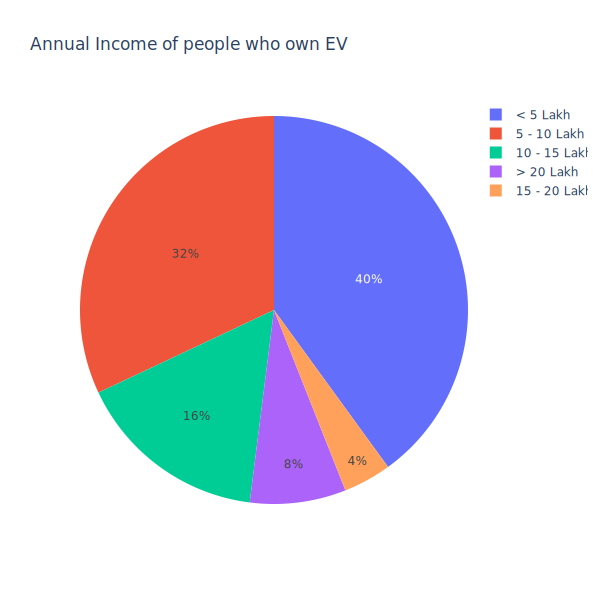

In [ ]:
fig = px.pie(names=Annual_Income, values=Annual_Income_Count, title='Annual Income of people who own EV',width=600, height=600)
fig.show()

In [ ]:
df.Area_of_Living.unique()

array(['Urban', 'Sub Urban'], dtype=object)

In [ ]:
Area_of_Living = ['Urban', 'Sub Urban']

In [ ]:
df['Area_of_Living'].value_counts()

Urban        20
Sub Urban     5
Name: Area_of_Living, dtype: int64

In [ ]:
Area_of_Living_count = [20, 5]

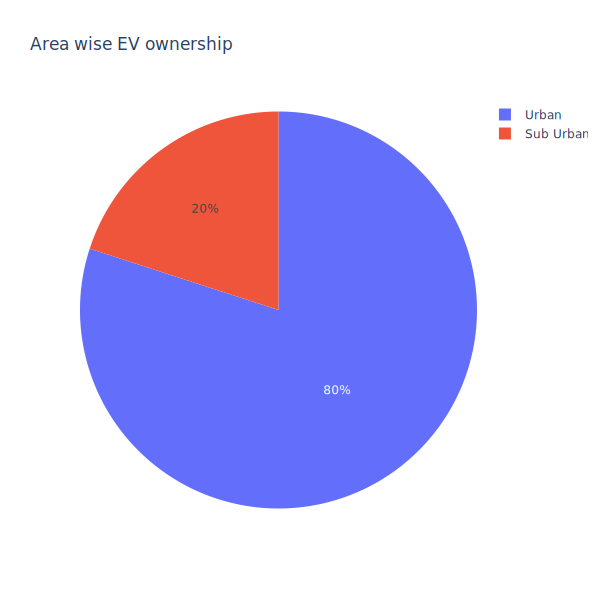

In [ ]:
fig = px.pie(names=Area_of_Living, values=Area_of_Living_count, title='Area wise EV ownership',width=600, height=600)
fig.show()

#### Reason for Purchasing an EV

In [ ]:
df.Reason_own.unique()

array(['High fuel Prices', 'Environmentally better',
       'Convenience (no petrol pumps )', 'Trendy', 'Better performance'],
      dtype=object)

In [ ]:
df['Reason_own'].value_counts()

Environmentally better            9
High fuel Prices                  6
Convenience (no petrol pumps )    6
Trendy                            2
Better performance                2
Name: Reason_own, dtype: int64

In [ ]:
Reason = ['High fuel Prices', 'Environmentally better', 'Convenience (no petrol pumps )', 'Trendy', 'Better performance']

In [ ]:
Reason_count = [6,9,6,2,2]

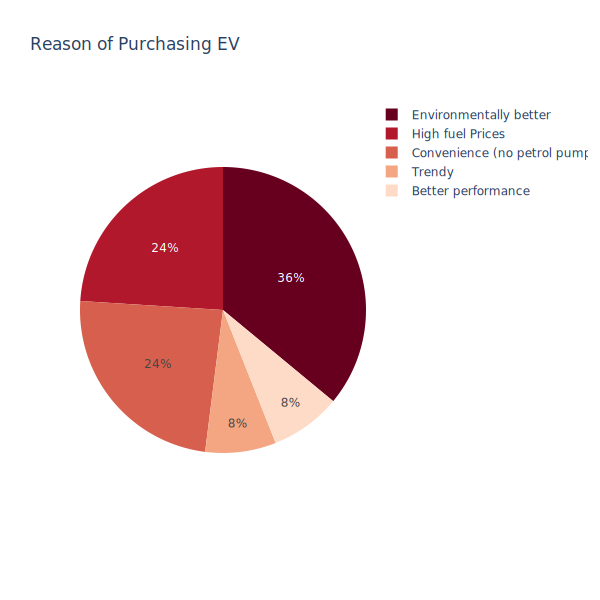

In [ ]:
fig = px.pie(names=Reason, values=Reason_count, title='Reason of Purchasing EV', color_discrete_sequence=px.colors.sequential.RdBu,width=600, height=600)
fig.show()

In [ ]:
data5 = survey[survey['EV_Interest'] == 'Yes']
data5.head()

,State_UT,Area_of_Living,Age,Annual_Income,Own_EV,Reason_own,EV_type,EV_price,EV_Manufacturar,EV_Range,EV_Recomendation,EV_Interest,EV_Interest_Type,EV_Budget,EV_Interest_Reason,Vehicle_Preference
0,Telangana,Urban,19,10 - 15 Lakh,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2 Wheeler,20000.0000,High fuel prices,Electric Vehicles
1,Maharashtra,Urban,21,< 5 Lakh,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2 Wheeler,100000.0000,High fuel prices,Electric Vehicles
2,Maharashtra,Rural,20,< 5 Lakh,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Electric Vehicles
3,Maharashtra,Urban,20,10 - 15 Lakh,Yes,High fuel Prices,2 Wheeler,125000.0000,Bajaj,90.0000,Yes,Yes,4 Wheeler,500000.0000,Environmentally better,Electric Vehicles
4,Maharashtra,Urban,27,< 5 Lakh,No,NaN,NaN,NaN,NaN,NaN,Yes,Yes,4 Wheeler,2000000.0000,Better performance,Electric Vehicles


In [ ]:
data5.EV_Interest_Reason.unique()

array(['High fuel prices', nan, 'Environmentally better',
       'Better performance', 'Convenience (no petrol pumps )', 'Trendy'],
      dtype=object)

In [ ]:
data5['EV_Interest_Reason'].value_counts()


Environmentally better            67
High fuel prices                  26
Convenience (no petrol pumps )    18
Better performance                16
Trendy                             1
Name: EV_Interest_Reason, dtype: int64

In [ ]:
Reason = ['High fuel Prices', 'Environmentally better', 'Convenience (no petrol pumps )', 'Trendy', 'Better performance']

In [ ]:
Reason_count = [26,67,18,1,16]

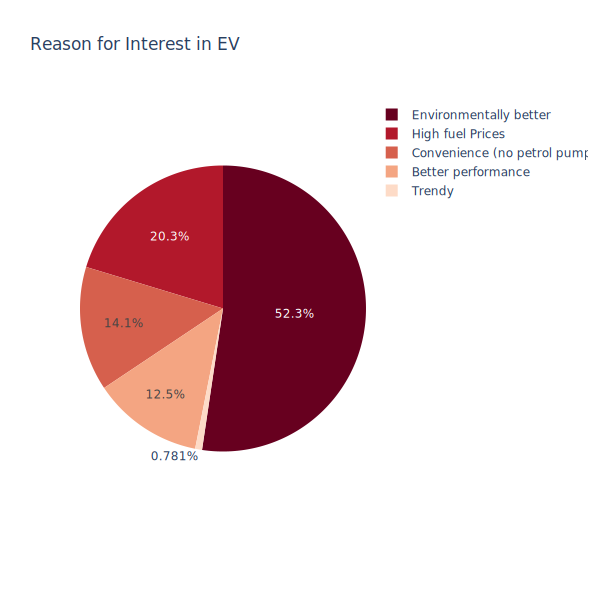

In [ ]:
fig = px.pie(names=Reason, values=Reason_count, title='Reason for Interest in EV', color_discrete_sequence=px.colors.sequential.RdBu,width=600, height=600)
fig.show()

In [ ]:
data5.EV_Interest_Type.unique()

array(['2 Wheeler', nan, '4 Wheeler', '3 Wheeler'], dtype=object)

In [ ]:
data5['EV_Interest_Type'].value_counts()

2 Wheeler    75
4 Wheeler    61
3 Wheeler     2
Name: EV_Interest_Type, dtype: int64

In [ ]:
EV_Interest_Type = ['2 Wheeler', '4 Wheeler', '3 Wheeler']

In [ ]:
EV_Interest_Type_count = [75,61,2]

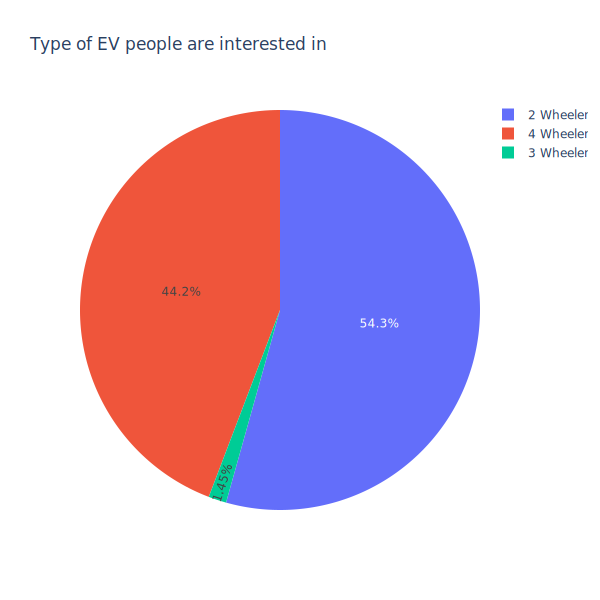

In [ ]:
fig = px.pie(names=EV_Interest_Type, values=EV_Interest_Type_count, title='Type of EV people are interested in',width=600, height=600)
fig.show()

In [ ]:
data6 = survey.query('EV_type == "2 Wheeler"')

In [ ]:
data6.head()

,State_UT,Area_of_Living,Age,Annual_Income,Own_EV,Reason_own,EV_type,EV_price,EV_Manufacturar,EV_Range,EV_Recomendation,EV_Interest,EV_Interest_Type,EV_Budget,EV_Interest_Reason,Vehicle_Preference
3,Maharashtra,Urban,20,10 - 15 Lakh,Yes,High fuel Prices,2 Wheeler,125000.0000,Bajaj,90.0000,Yes,Yes,4 Wheeler,500000.0000,Environmentally better,Electric Vehicles
5,Telangana,Urban,18,5 - 10 Lakh,Yes,High fuel Prices,2 Wheeler,80000.0000,Okinawa,40.0000,No,No,4 Wheeler,500000.0000,High fuel prices,Internal Combustion Vehicles
8,Maharashtra,Urban,21,5 - 10 Lakh,Yes,High fuel Prices,2 Wheeler,100000.0000,Ola,150.0000,Yes,No,4 Wheeler,NaN,High fuel prices,Electric Vehicles
9,Karnataka,Urban,23,5 - 10 Lakh,Yes,Environmentally better,2 Wheeler,100000.0000,Ather,40.0000,Yes,Yes,2 Wheeler,200000.0000,Environmentally better,Electric Vehicles
12,Karnataka,Urban,22,< 5 Lakh,No,Environmentally better,2 Wheeler,100000.0000,Ola,67.0000,Yes,Yes,2 Wheeler,100000.0000,Better performance,Electric Vehicles


In [ ]:
data6.EV_Manufacturar.unique()

array(['Bajaj', 'Okinawa', 'Ola', 'Ather', 'Kinetic', 'Okinawa ', 'Tata',
       'Kinetic ', nan, 'Vespa', 'Pure', 'Honda', 'Eve', 'Mahindra',
       'Hero'], dtype=object)

In [ ]:
data6['EV_Manufacturar'].value_counts()

Ola         6
Tata        6
Ather       4
Hero        3
Bajaj       2
Okinawa     1
Kinetic     1
Okinawa     1
Kinetic     1
Vespa       1
Pure        1
Honda       1
Eve         1
Mahindra    1
Name: EV_Manufacturar, dtype: int64

In [ ]:
Two_Wheeler_Manf = ['Bajaj', 'Ather', 'Tata', 'Ola', 'Kinetic', 'Pure', 'Vespa','Mahindra','Honda', 'Eve','Okinawa','Hero']

In [ ]:
Two_Wheeler_Manf_count = [2,4,6,6,2,1,1,1,1,1,1,3]

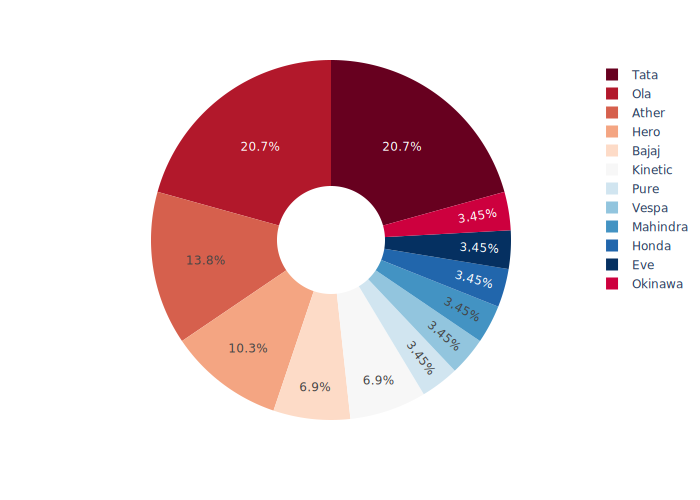

In [ ]:
fig = px.pie(names=Two_Wheeler_Manf, values=Two_Wheeler_Manf_count,color_discrete_sequence=px.colors.sequential.RdBu,hole=.3)
fig.show()

In [ ]:
data7 = survey.query('EV_type == "4 Wheeler"')

In [ ]:
data7.EV_Manufacturar.unique()

array(['Tata', 'Nexon', 'Ola', nan, 'Mahindra', 'Audi'], dtype=object)

In [ ]:
data7['EV_Manufacturar'].value_counts()

Tata        4
Nexon       1
Ola         1
Mahindra    1
Audi        1
Name: EV_Manufacturar, dtype: int64

In [ ]:
Four_Wheeler_Manf = ['Tata', 'Ola', 'Mahindra', 'Audi']

In [ ]:
Four_Wheeler_Manf_count = [5,1,1,1]

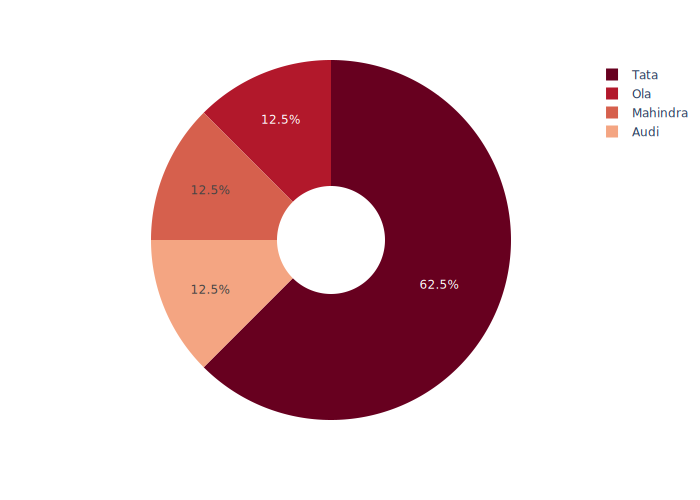

In [ ]:
fig = px.pie(names=Four_Wheeler_Manf, values=Four_Wheeler_Manf_count,color_discrete_sequence=px.colors.sequential.RdBu,hole=.3)
fig.show()

In [ ]:
fuel_data = pd.read_csv(r'fuel-efficiency.csv')

In [ ]:
nh_avg = fuel_data.query('`Hybrid/Non-Hybrid` == "Non-Hybrid"')
nh_avg = nh_avg['FUEL COSTS PER MILE'].mean()

In [ ]:
h_avg = fuel_data.query('`Hybrid/Non-Hybrid` == "Hybrid"')
h_avg = h_avg['FUEL COSTS PER MILE'].mean()

In [ ]:
df = pd.DataFrame({'Hybrid': [h_avg], 'Non Hybrid': [nh_avg]})
df.index = ['FUEL COSTS PER MILE']

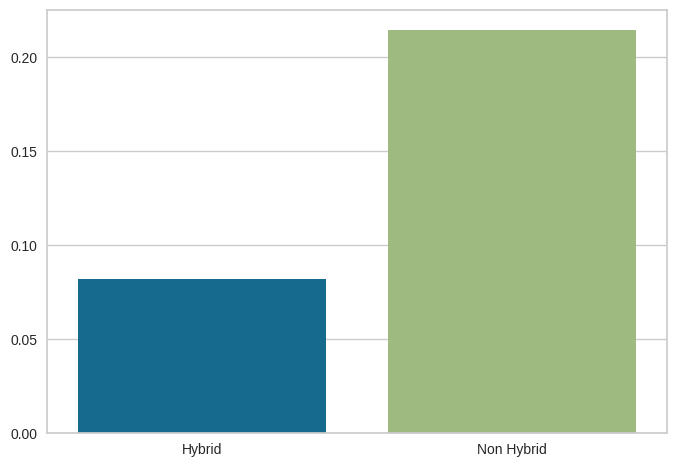

In [ ]:
priceplt = sns.barplot(data=df)

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8000,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5000,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


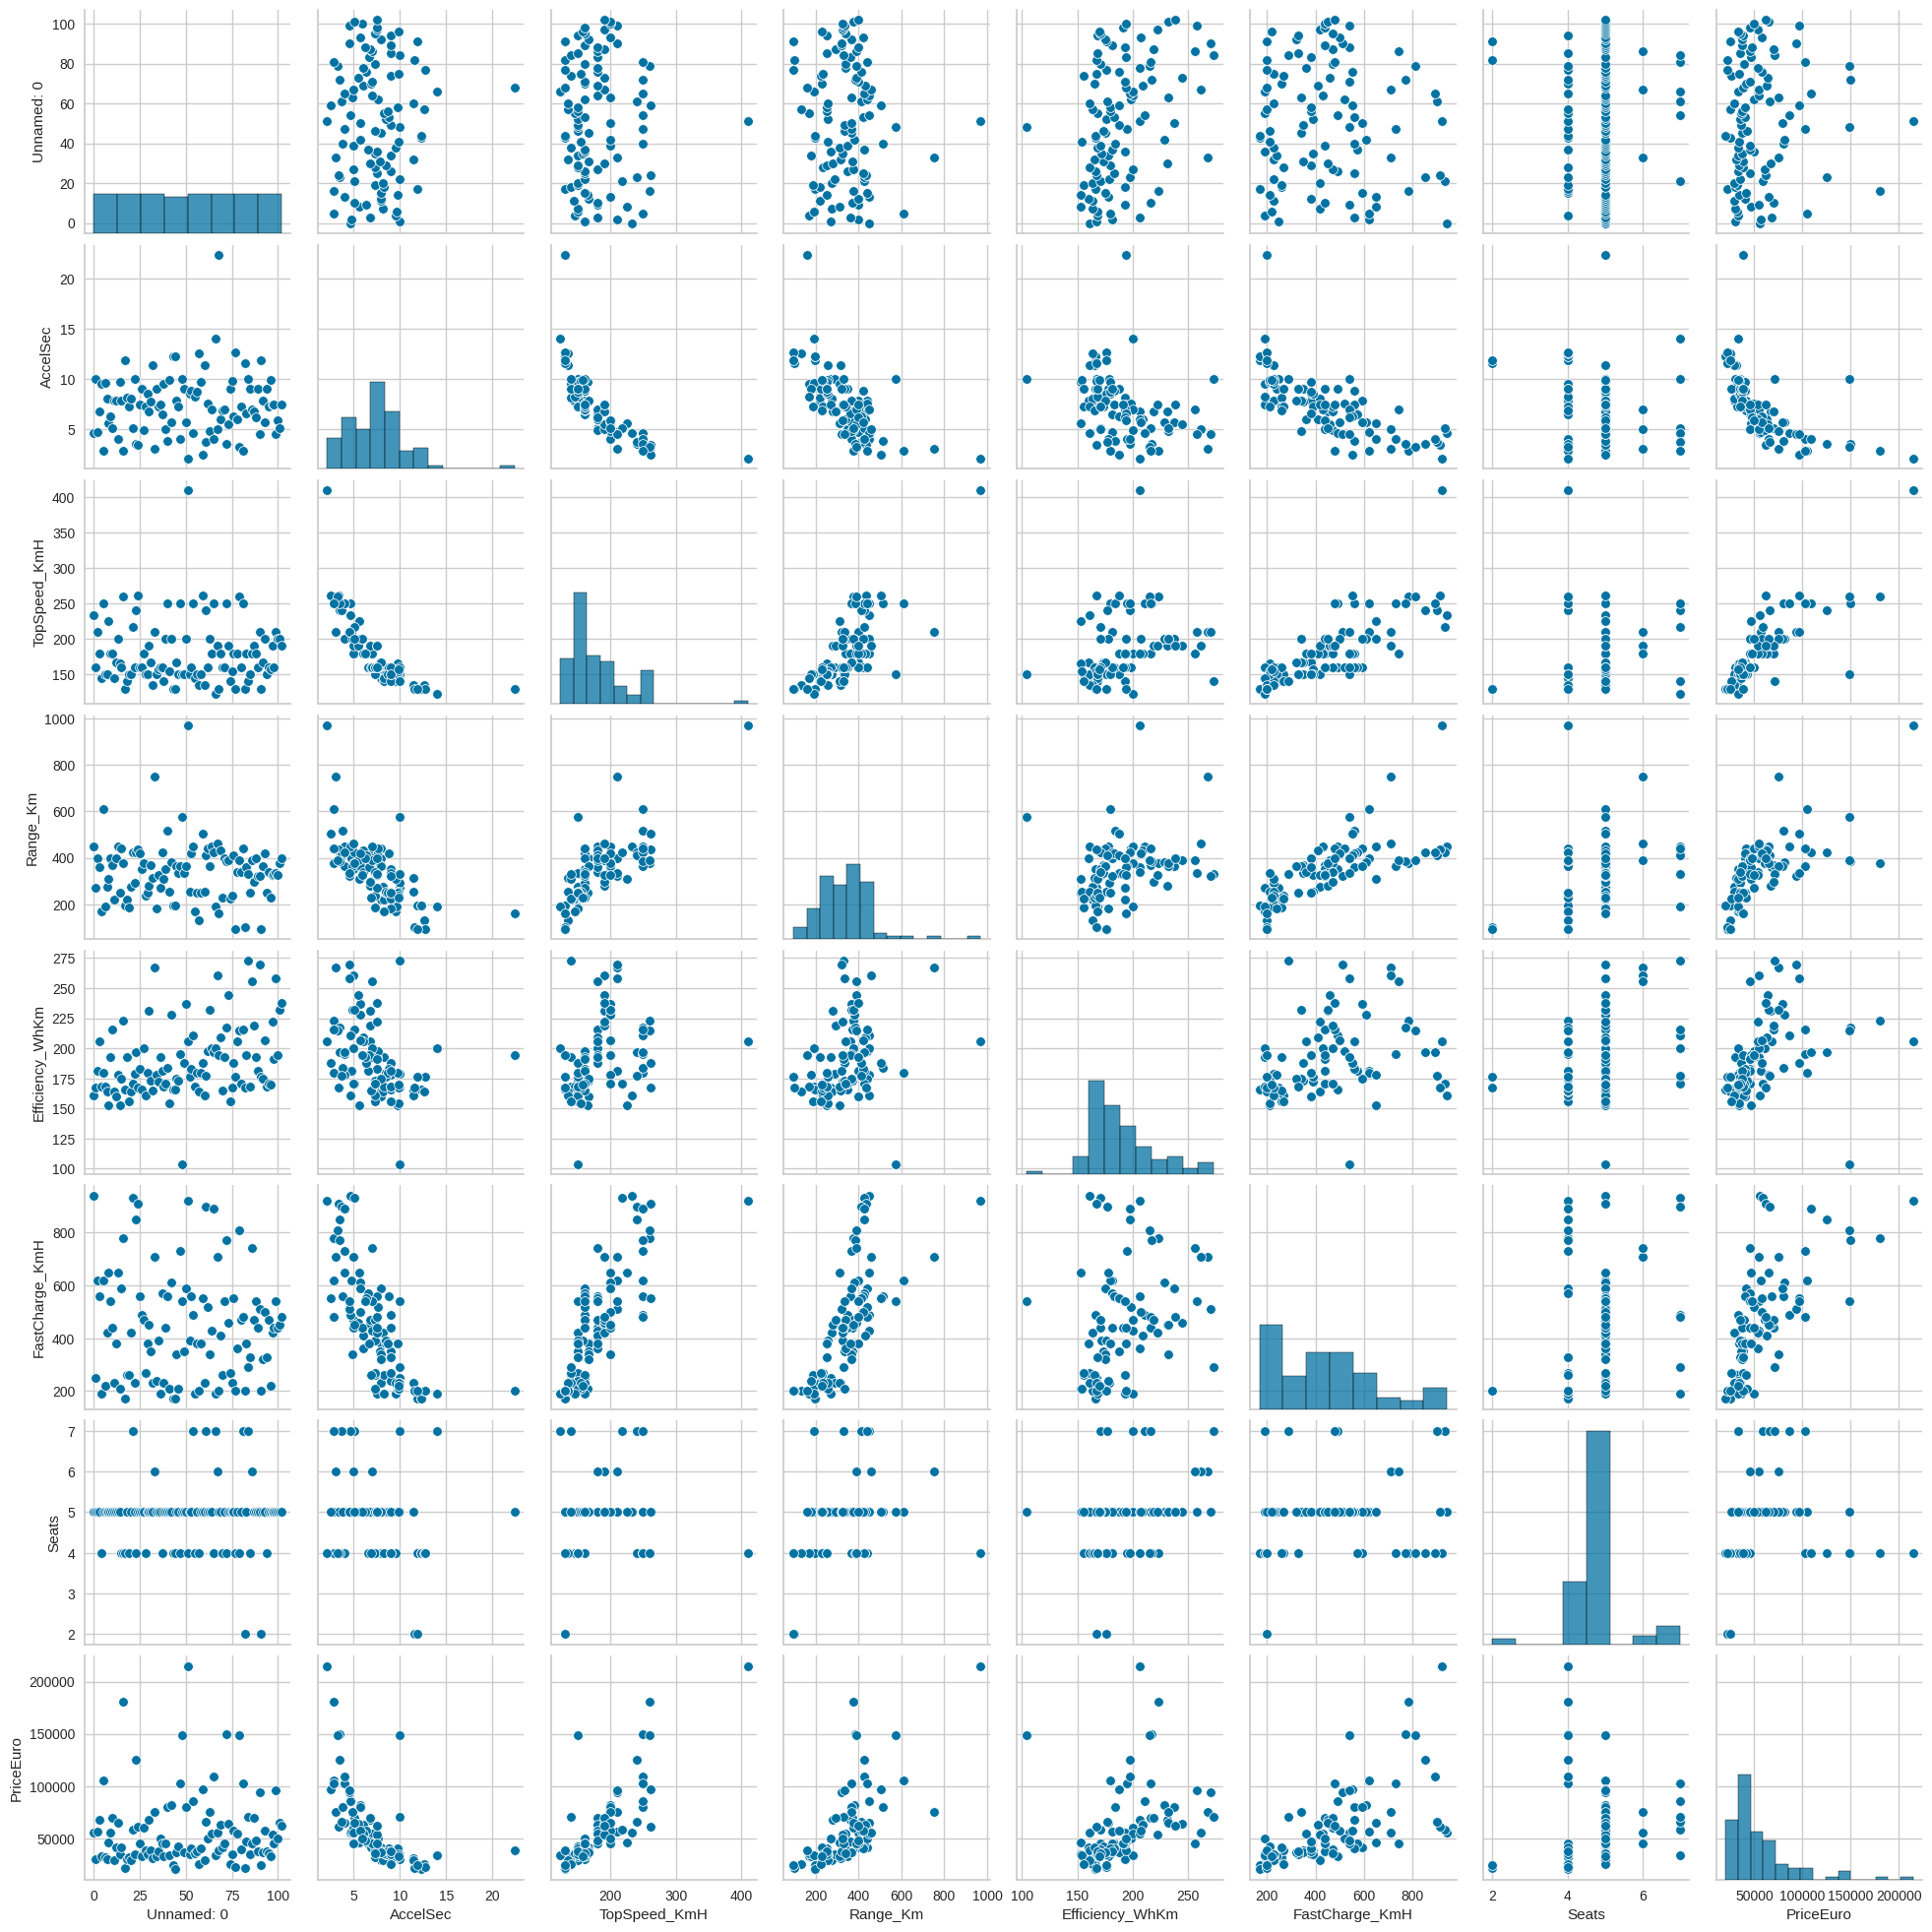

In [ ]:
sns.pairplot(df)

#### The above pairplot shows correlation between every two pairs present in the dataset.

In [ ]:
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

<ipython-input-110-9279af5eec59>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

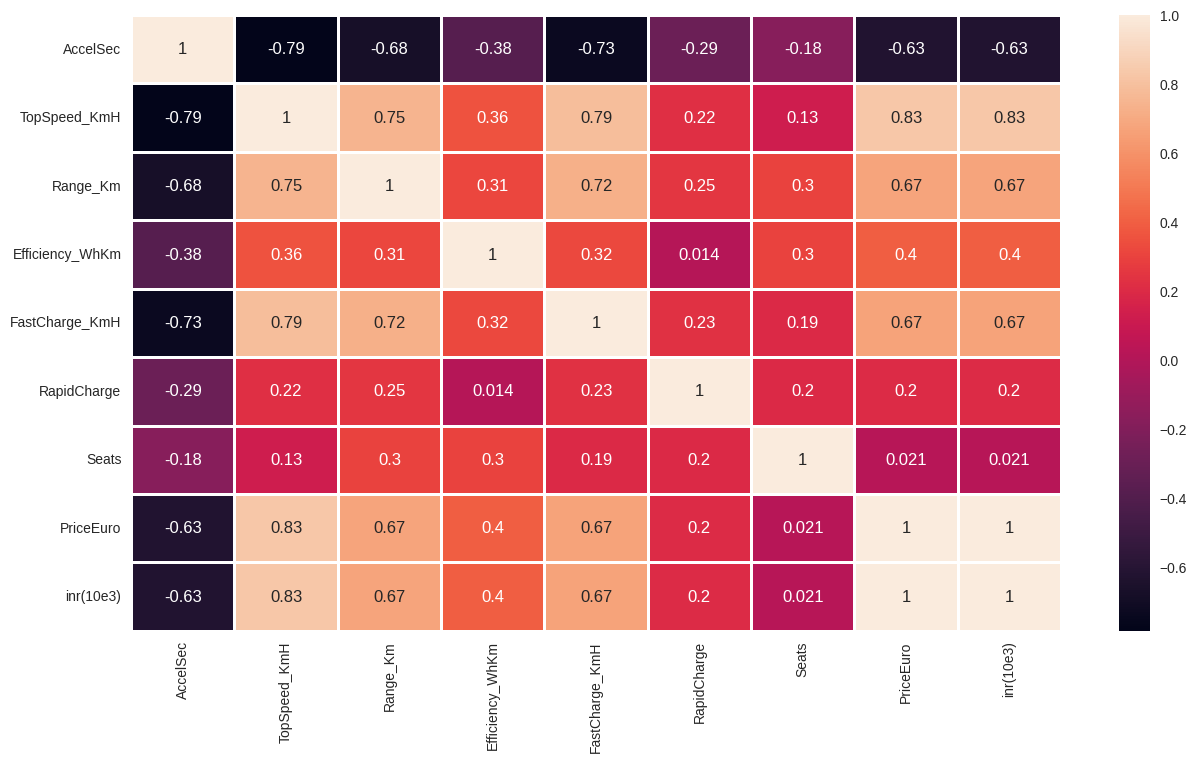

In [ ]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

### Checking out for null values

In [ ]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

### Descriptive Statistics of the dataset

In [ ]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,7.3961,179.1942,338.7864,189.1650,444.2718,0.7476,4.8835,55811.5631,4643.5221
std,3.0174,43.5730,126.0144,29.5668,203.9493,0.4365,0.7958,34134.6653,2840.0042
min,2.1000,123.0000,95.0000,104.0000,170.0000,0.0000,2.0000,20129.0000,1674.7328
25%,5.1000,150.0000,250.0000,168.0000,260.0000,0.5000,5.0000,34429.5000,2864.5344
50%,7.3000,160.0000,340.0000,180.0000,440.0000,1.0000,5.0000,45000.0000,3744.0000
75%,9.0000,200.0000,400.0000,203.0000,555.0000,1.0000,5.0000,65000.0000,5408.0000
max,22.4000,410.0000,970.0000,273.0000,940.0000,1.0000,7.0000,215000.0000,17888.0000


In [ ]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [ ]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

### Finding out Linear regression using OLS method

In [ ]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [ ]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.57e-24
Time:                        07:32:36   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     -4.324      0.000    -1.5e+05   -5.58e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain       5235.8309   2956.235      1.771      0.080    -632.248    1.11e+04
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

1. Standard Errors assume that the covariance matrix of the errors is correctly specified.
2. The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

Only Top Speed and Efficieny are the two variables related to price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

#### Finding out the R-squared value

In [ ]:
r2=(r2_score(y_test,pred))
print(r2*100)

78.77072380232661


### Around 78 % of the dependent variable has been explained by the independent variables